## Imports

---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from google.colab import files
import io
from IPython.display import clear_output
clear_output()


## Carga del dataset

In [3]:
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['student_habits_performance.csv']))
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Descripción del dataset

In [5]:
print(df[df.parental_education_level.isnull()])

    student_id  age  gender  study_hours_per_day  social_media_hours  \
10       S1010   19  Female                  4.6                 3.7   
33       S1033   18  Female                  4.0                 0.9   
47       S1047   23  Female                  2.5                 2.9   
74       S1074   21  Female                  2.3                 1.0   
93       S1093   22    Male                  4.1                 2.5   
..         ...  ...     ...                  ...                 ...   
921      S1921   23  Female                  4.4                 2.7   
925      S1925   19   Other                  1.7                 2.9   
939      S1939   18  Female                  4.7                 3.2   
945      S1945   23    Male                  6.0                 2.9   
967      S1967   22    Male                  5.2                 4.1   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10             0.8            No                   77.6        

### 91 datos de la serie parental_education_level son valores nulos, y representan el 9,1% de los datos, nos conviene imputarlos con la moda de dicha serie. Si es bimodal, asignaremos aleatoriamente los dos valores, respetando su proporción.

## Analisis de la variable parental_education_level

In [6]:
# Extraemos la serie
educacionPadres = df['parental_education_level']

In [7]:
# Comprobamos cuantas veces aparece cada categoria dentro de la serie
conteo = educacionPadres.value_counts(dropna=False) # para q me muestre los Nan
print(conteo)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64


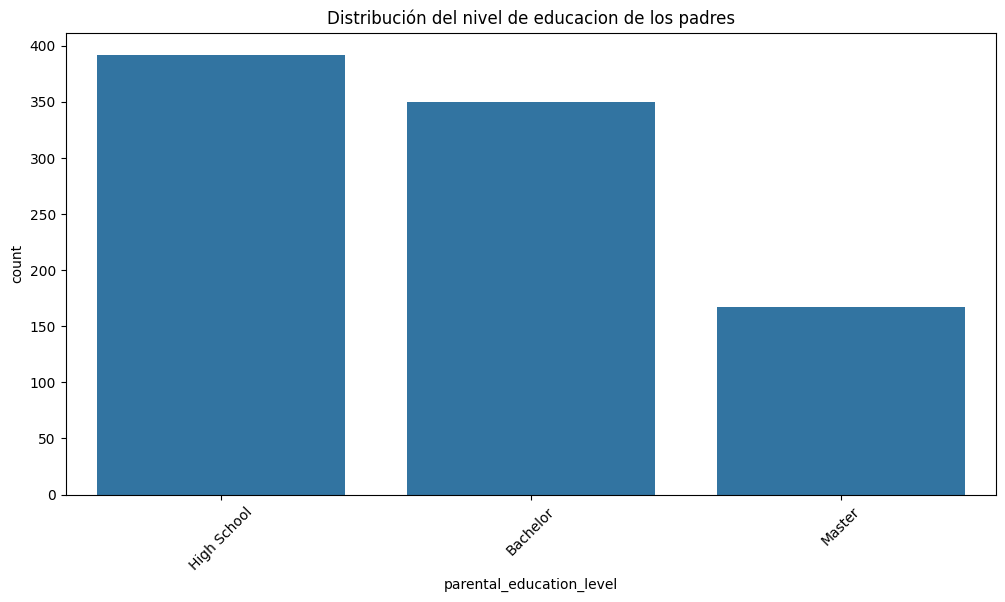

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'parental_education_level', order = educacionPadres.value_counts().index) #los Nan no se pueden graficar con sns
plt.title('Distribución del nivel de educacion de los padres')
plt.xticks(rotation = 45)
plt.show()

## Cálculo de proporciones para evaluar si es una Distribución Bimodalidad

In [9]:
porcentajes = educacionPadres.value_counts(normalize = True,dropna=False)*100
print(porcentajes)

parental_education_level
High School    39.2
Bachelor       35.0
Master         16.7
NaN             9.1
Name: proportion, dtype: float64


### Claramente tenemos una Distribución Bimodal, con dos categorías, que representan el 74,2% de los datos, por lo tanto no es recomendado eliminar los valores Nan. Podemos agregar otra categoría que sea desconocida, pero sería agregar más datos, de los cuales no sabemos nada. Por otra parte, podemos imputar los Nan en relación a la proporción que hay con las 2 modas, esto es asignar los Nan aleatoriamente a "high_school" o "bachelor" respetando sus proporciones.


*   Ventaja: Mantiene la distribución original.
*   Desventaja: Introduce aleatoriedad.



In [10]:
# Extraemos los Nan de la serie 'parental_education_level' por su indice
indices_nan = df[df['parental_education_level'].isna()].index

# como tenemos una lista de indices que tienen los nan de ''parental_education_level''
df.loc[indices_nan,'parental_education_level'] = np.random.choice(
    ['High School','Bachelor'],
    size = len(indices_nan),
    p = [0.392/0.742, 0.35/0.742]
) # esto agarra de la serie parental_education_level los indices que tienen Nan,
  # y le asigna aleatoriamente con np.random.choice el valor High school o Bachelor
  #size = len(indices_nan) hace q genere tantos valores aleatorios como tengo en indices nan (91)
  # p = .... como del total 0,742 es lo q representan los valores bimodales de este total saco el porcentaje
  # entonces me da la probabilidad proporcional a cada categoria segun su distribucion real. es la proporcion real digamos.


In [11]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [12]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0
